In [286]:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [288]:
DataPath = "C:\\Users\\gregl\\Desktop\\ML_Projects\\Housing Price Predictor\\housing.csv"
data = pd.read_csv(DataPath)

In [289]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [291]:
data.dropna(inplace=True)

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [293]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [295]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6477,-118.08,34.09,32.0,3214.0,718.0,2316.0,751.0,3.7066,<1H OCEAN,206800.0
7446,-118.16,33.93,35.0,757.0,151.0,474.0,132.0,3.7361,<1H OCEAN,179800.0
11511,-118.11,33.73,32.0,1258.0,333.0,645.0,334.0,5.0476,NEAR OCEAN,500001.0
16392,-121.23,38.04,32.0,1829.0,262.0,677.0,243.0,6.1805,INLAND,247900.0
7395,-118.25,33.95,41.0,1576.0,339.0,1252.0,302.0,1.9798,<1H OCEAN,98100.0
...,...,...,...,...,...,...,...,...,...,...
20284,-119.17,34.18,38.0,3221.0,783.0,2792.0,736.0,2.9118,NEAR OCEAN,172400.0
18459,-121.80,37.27,10.0,3301.0,593.0,2190.0,575.0,6.2230,<1H OCEAN,260700.0
7778,-118.08,33.91,30.0,3259.0,942.0,2744.0,895.0,2.8608,<1H OCEAN,165600.0
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,<1H OCEAN,318900.0


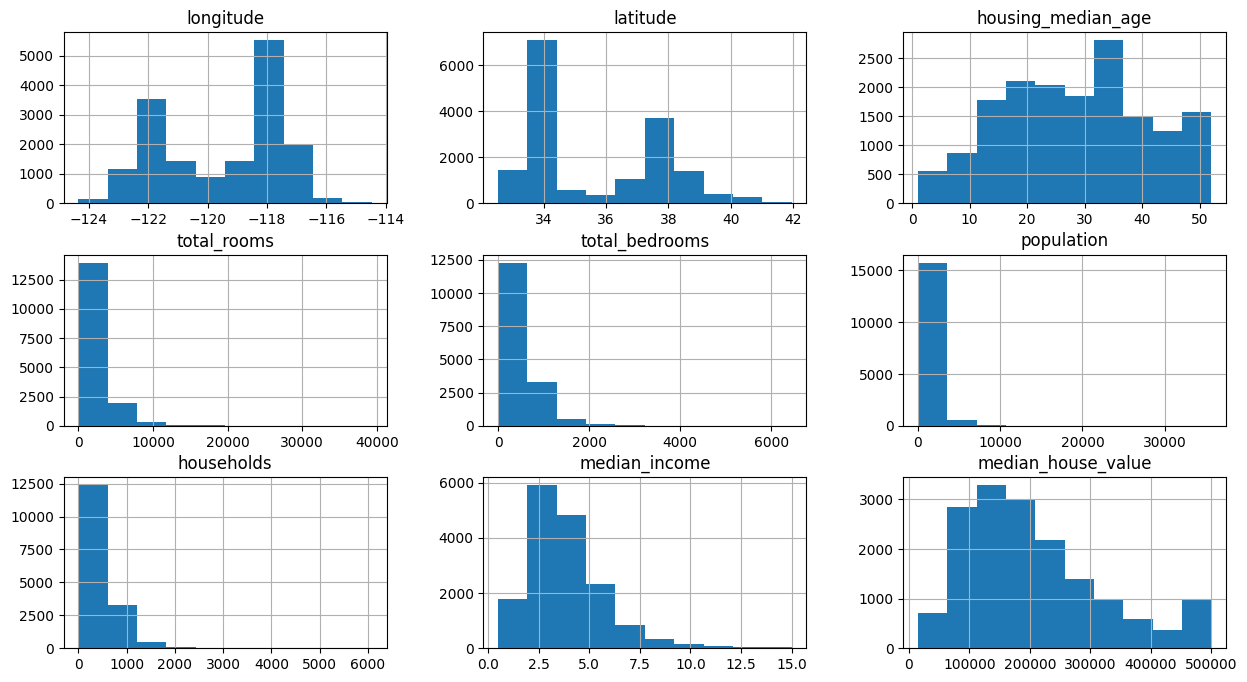

In [296]:
_ = train_data.hist(figsize=(15, 8))

<Axes: >

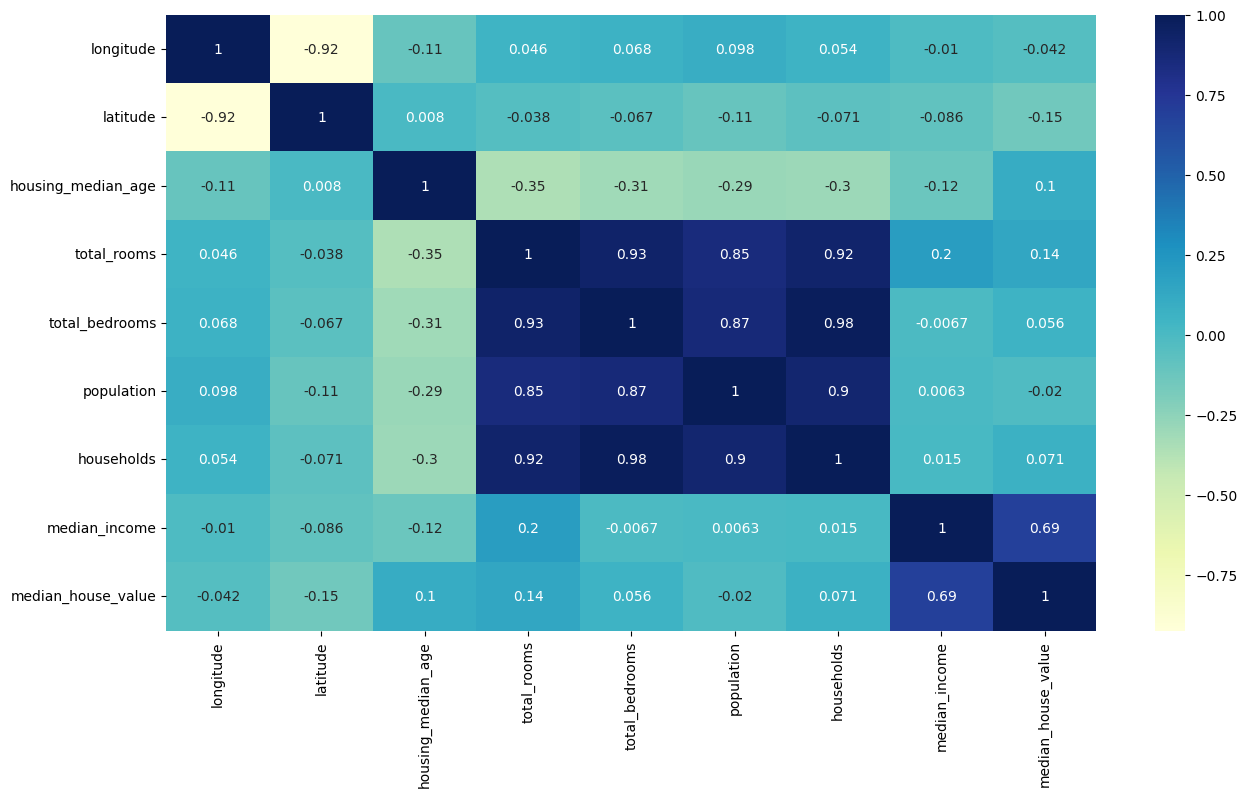

In [297]:
heatmap_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap="YlGnBu")

### Pre-processing

In [298]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)

In [299]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7223
INLAND        5196
NEAR OCEAN    2117
NEAR BAY      1807
ISLAND           3
Name: count, dtype: int64

In [300]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

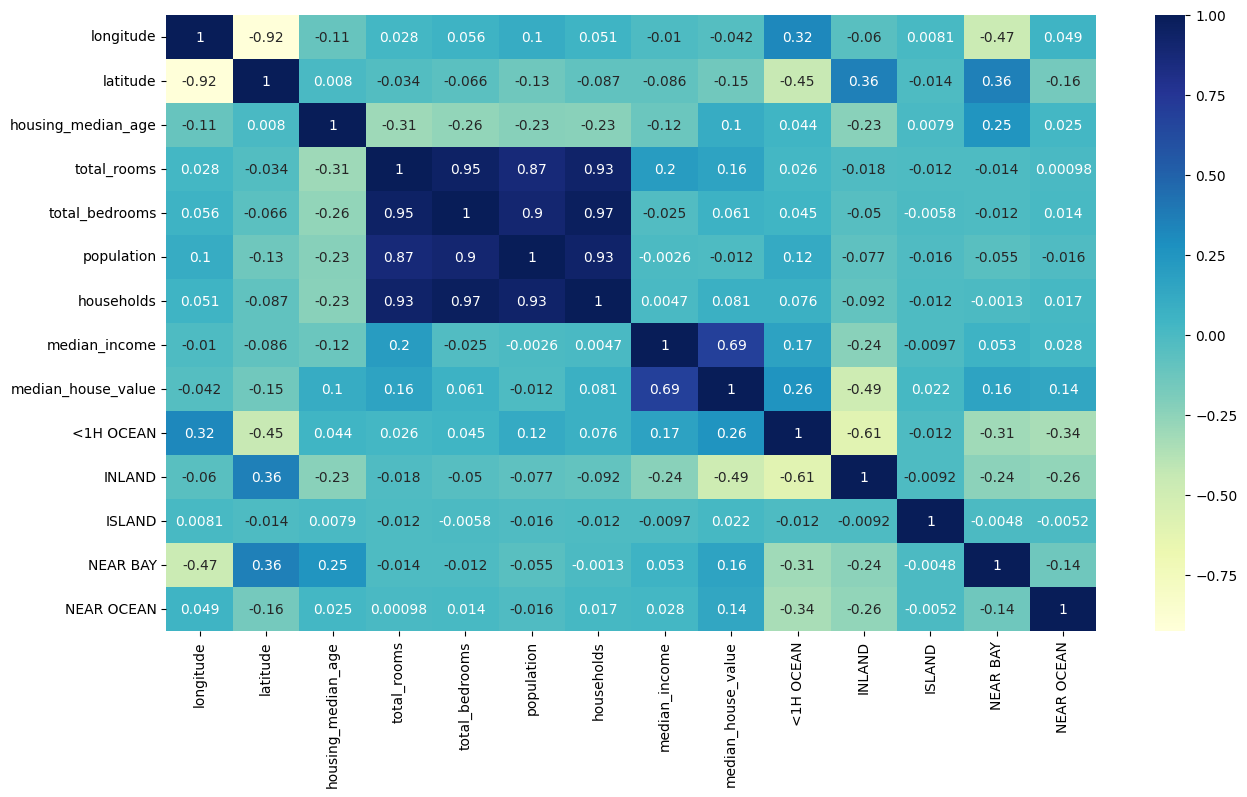

In [301]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

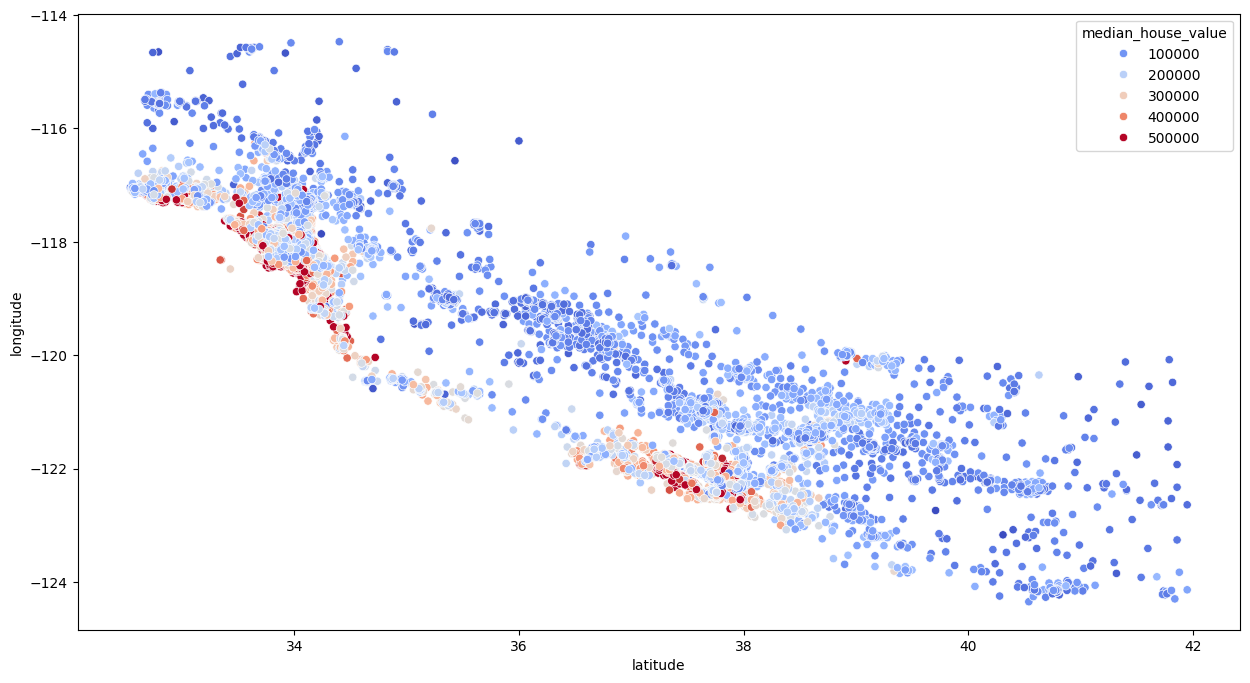

In [302]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.show()

In [303]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

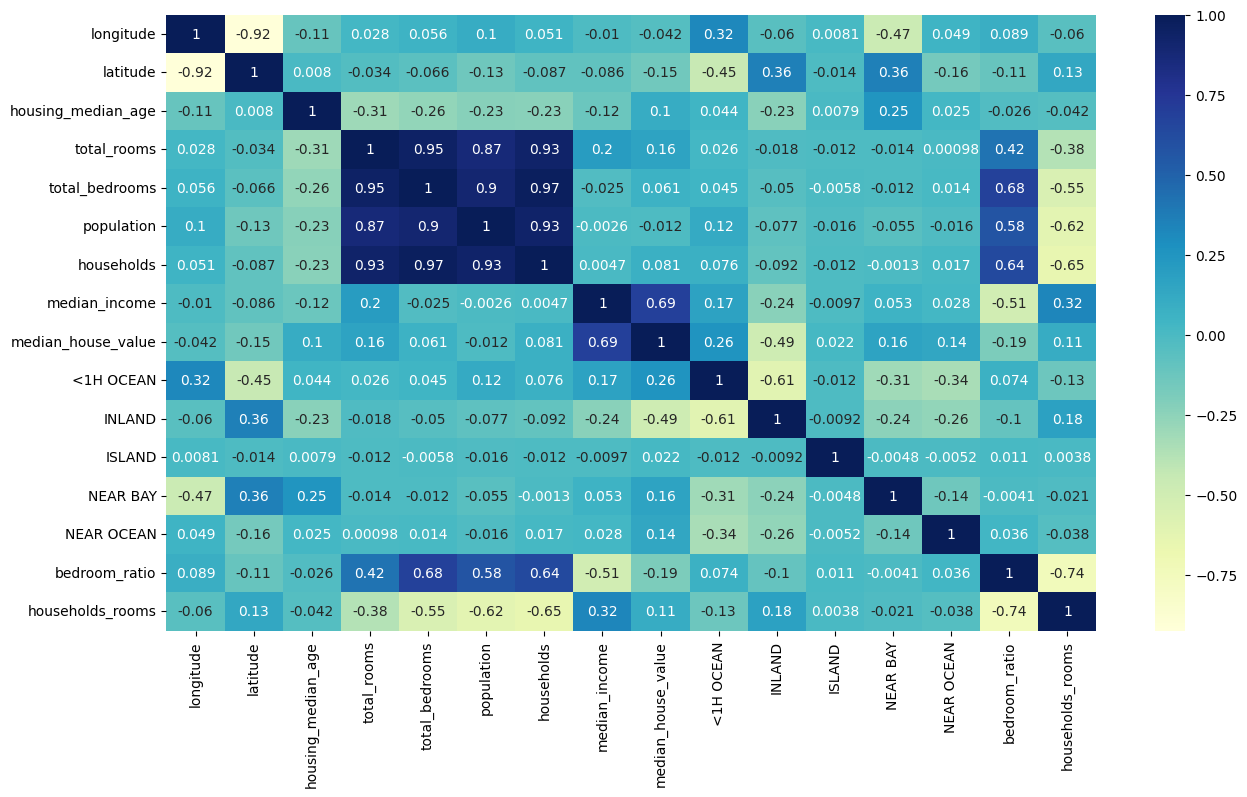

In [304]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### Buiding our models

In [305]:
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [306]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [307]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [308]:
X_test_s = scaler.transform(X_test)

In [309]:
reg.score(X_test_s, y_test)

0.683730151097959

### Using RandomForestRegressor

In [310]:
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [311]:
forest.score(X_test_s, y_test)

0.8188768695357386